In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/MuseumTrain/museum_train.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

# Image Processing


In [5]:
indoor_train_path = 'museum_train/indoor'
outdoor_train_path = 'museum_train/outdoor'

In [6]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        img = img.resize((64, 64))  # Resize images to a common size
        img = img.convert('L')  # Convert to grayscale (optional)
        img = np.array(img).flatten()  # Flatten the image to 1D array
        img = img/255
        images.append(img)
        labels.append(label)
    return images, labels

In [7]:
indoor_train_images, indoor_train_labels = load_images_from_folder(indoor_train_path, label=0)
outdoor_train_images, outdoor_train_labels = load_images_from_folder(outdoor_train_path, label=1)

In [8]:
X = np.array(indoor_train_images + outdoor_train_images)
y = np.array(indoor_train_labels + outdoor_train_labels)

# Splitting the Dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Model 1

In [10]:
model_1 = GradientBoostingClassifier(learning_rate=0.01,
                                   n_estimators=10,
                                   verbose=1,
                                   random_state=42,)
model_1.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3831           58.44s
         2           1.3800           51.20s
         3           1.3770           45.18s
         4           1.3740           38.49s
         5           1.3711           32.00s
         6           1.3682           25.52s
         7           1.3649           19.10s
         8           1.3621           12.70s
         9           1.3588            6.35s
        10           1.3560            0.00s


GradientBoostingClassifier(learning_rate=0.01, n_estimators=10, random_state=42,
                           verbose=1)

# Evaluation Metrics for model 1


Accuracy: 66.25%
Precision: 62.57%
Recall: 78.85%
F1 Score: 69.77%


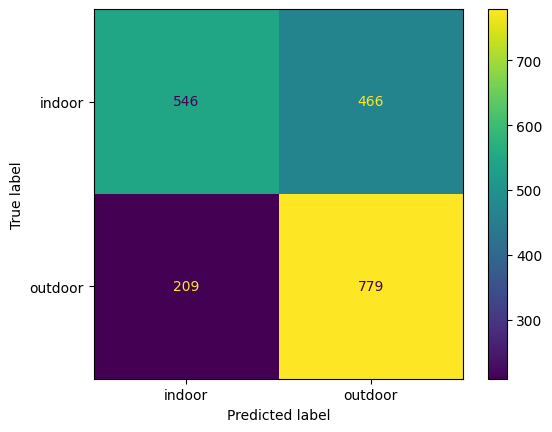

In [11]:
y_pred = model_1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1score * 100:.2f}%')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['indoor','outdoor'])

# Testing on test image

In [12]:
def load_single_images(image):
    img = Image.open(image)
    img = img.resize((64, 64))
    img = img.convert('L')
    img = np.array(img).flatten()
    img = img/255
    return img

In [13]:
my_img = load_single_images('/content/drive/MyDrive/MuseumTrain/test_image_1.jpg')

In [14]:
model_1.predict(my_img.reshape(1,-1))

array([0])

# Training Model 2

In [15]:
model_2 = GradientBoostingClassifier(learning_rate=0.01,
                                   n_estimators=100,
                                   verbose=1,
                                   random_state=42,
                                   max_features='sqrt')
model_2.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3833            9.98s
         2           1.3805            9.98s
         3           1.3775            9.89s
         4           1.3744            9.79s
         5           1.3713            9.70s
         6           1.3684            9.59s
         7           1.3655            9.48s
         8           1.3626            9.37s
         9           1.3599            9.28s
        10           1.3570            9.18s
        20           1.3311            8.15s
        30           1.3084            7.13s
        40           1.2888            6.11s
        50           1.2702            5.10s
        60           1.2524            4.09s
        70           1.2370            3.07s
        80           1.2232            2.05s
        90           1.2087            1.02s
       100           1.1962            0.00s


GradientBoostingClassifier(learning_rate=0.01, max_features='sqrt',
                           random_state=42, verbose=1)

# Evaluation Metrics for model 2


Accuracy: 69.50%
Precision: 66.15%
Recall: 78.34%
F1 Score: 71.73%


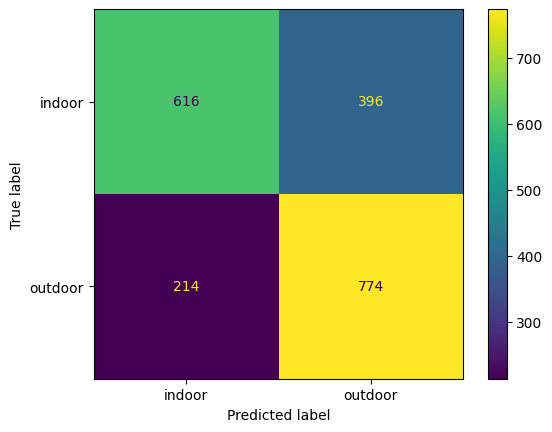

In [16]:
y_pred = model_2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1score * 100:.2f}%')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['indoor','outdoor'])

# Testing on test image

In [17]:
model_2.predict(my_img.reshape(1,-1))

array([0])

# Training Model 3

In [18]:
model_3 = GradientBoostingClassifier(learning_rate=0.001,
                                   n_estimators=500,
                                   verbose=1,
                                   random_state=42,
                                   max_features='sqrt',
                                   max_depth=10,
                                   subsample=0.5)
model_3.fit(X_train,y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3849           0.0005            1.78m
         2           1.3843           0.0010            1.78m
         3           1.3833           0.0008            1.80m
         4           1.3825           0.0010            1.80m
         5           1.3816           0.0009            1.82m
         6           1.3804           0.0007            1.83m
         7           1.3793           0.0007            1.84m
         8           1.3784           0.0010            1.85m
         9           1.3775           0.0011            1.85m
        10           1.3766           0.0010            1.85m
        20           1.3678           0.0009            1.84m
        30           1.3588           0.0010            1.81m
        40           1.3500           0.0008            1.76m
        50           1.3409           0.0007            1.72m
        60           1.3323           0.0009            1.68m
       

GradientBoostingClassifier(learning_rate=0.001, max_depth=10,
                           max_features='sqrt', n_estimators=500,
                           random_state=42, subsample=0.5, verbose=1)

# Evaluation Metrics for model 3


Accuracy: 76.95%
Precision: 76.32%
Recall: 77.33%
F1 Score: 76.82%


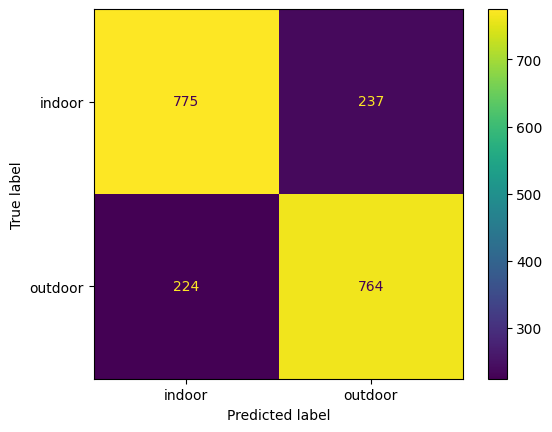

In [19]:
y_pred = model_3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1score * 100:.2f}%')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['indoor','outdoor'])

# Testing on test image

In [20]:
model_3.predict(my_img.reshape(1,-1))

array([0])